In [2]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")



PIL 라이브러리 import 완료!


In [3]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")




300  images to be resized.
300  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)


301  images to be resized.
301  images resized.


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

300  images to be resized.
300  images resized.


In [6]:
import numpy as np

def load_data(img_path, number_of_data=901):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
y_train_norm = y_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 901 입니다.
x_train shape: (901, 28, 28, 3)
y_train shape: (901,)


라벨:  0


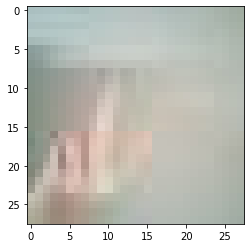

In [7]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])



In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()





Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (No

In [11]:
print(x_train.shape)
print(y_train.shape)



(901, 28, 28, 3)
(901,)


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
29/29 [==============================] - 26s 10ms/step - loss: 1.1051 - accuracy: 0.3241
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 1.0882 - accuracy: 0.3796
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 1.0298 - accuracy: 0.5405
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8261 - accuracy: 0.7292
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.7170
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.8246
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.8191
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8879
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8846
Epoch 10/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.9101


In [28]:
image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/"
resize_images(image_dir_path_test)

print("test 이미지 resize 완료!")

201  images to be resized.
201  images resized.
test 이미지 resize 완료!


In [29]:
(x_test, y_test)=load_data(image_dir_path_test, 201) # 테스트 데이터
print()
print('최소값 : {}, 최대값 : {}'.format(np.min(x_test), np.max(x_test)))

# 테스트 데이터 정규화
x_test_norm = x_test / 255.0
print('정규화 후 최소값 : {}, 최대값 : {}'.format(np.min(x_test_norm), np.max(x_test_norm)))

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))



학습데이터(x_train)의 이미지 개수는 0 입니다.

최소값 : 0, 최대값 : 0
정규화 후 최소값 : 0.0, 최대값 : 0.0
x_test shape: (201, 28, 28, 3)
y_test shape: (201,)


In [30]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

7/7 - 0s - loss: 1.0102 - accuracy: 1.0000
test_loss: 1.0102190971374512 
test_accuracy: 1.0
